# Getting started

It is assumed that you have read
[start](start.ipynb)
and followed the installation instructions there.

# Corpus

This is

* `quran` Q'uran

# First acquaintance

We just want to grasp what the corpus is about and how we can find our way in the data.

Open a terminal or command prompt and say one of the following

```text-fabric quran```

Wait and see a lot happening before your browser starts up and shows you an interface on the corpus:

Text-Fabric needs an app to deal with the corpus-specific things.
It downloads/finds/caches the latest version of the **app**:

```
Using TF-app in /Users/dirk/text-fabric-data/annotation/app-quran/code:
	#c55d75da760bfdc6ae272b3ade9629fe34d059ce (latest commit)
```

It downloads/finds/caches the latest version of the **data**:

```
Using data in /Users/dirk/text-fabric-data/q-ran/quran/tf/0.4:
	rv0.5=#60bd6788dadb13974e89df55cde7687c0593e65f (latest release)
```

The data is preprocessed in order to speed up typical Text-Fabric operations.
The result is cached on your computer.
Preprocessing costs time. Next time you use this corpus on this machine, the startup time is much quicker.

```
TF setup done.
```

Then the app goes on to act as a local webserver serving the corpus that has just been downloaded
and it will open your browser for you and load the corpus page

```
 * Running on http://localhost:8105/ (Press CTRL+C to quit)
Opening quran in browser
Listening at port 18985
```

<img src="images/q-bare.png" width="600">

# Help!

Indeed, that is what you need. Click the vertical `Help` tab.

From there, click around a little bit. Don't read closely, just note the kinds of information that is presented to you.

Later on, it will make more sense!

# Browsing

First we browse our data. Click the browse button.

<img src="images/q-browse.png" width="800">

and then, in the table of *documents* (suras), click on one.

<img src="images/q-documents.png" width="200">


Now you're looking at the ayas of a sura: the marks in an Arabic unicode  characters.

<img src="images/q-sura.png" width="1000">

Now click the *Options* tab and select the `text-trans-full` format to see the sura tablet in ascii transcription.

<img src="images/q-ascii.png" width="1000">

You can click a triangle to see how a line is broken down:

<img src="images/q-drill.png" width="800">

# Searching

An  aya is a verse in a  sura.
Let's find all the ayas that contain a verb followed by the word for Allah.

Enter this query in the search pad and press the search icon above it.

```
aya
  word pos=verb
  <: word pos=noun
          posx=proper
          root=Alh
```

<img src="images/q-search.png" width="1200">

In English:

search all `aya`s that contain a `word` and a `word`  where:

* `<:` the second `word` follows immediately on the first `word`
* the first `word` has value `verb`  for feature `pos` (part-of-speech)
* the second `word` has
  * value `noun`  for feature `pos`
  * value `proper` for feature `posx` (subcategorisation of part-of-speech)
  * value `Alh` for feature `root` (basic word form, more fundamental than lemma)

You can expand results by clicking the triangle.

You can see the result in context by  clicking the browse icon.

You can go back to the result list by clicking the results icon.

<img src="images/q-back.png" width="1000">

This corpus has a feature for ayas in which an English translation is given: `translation@en`.

We can trigger the display of these translations by mentioning the feature in the query without posing additional constraints:

```
aya translation@en*
  word pos=verb
  <: word pos=noun
          posx=proper
          root=Alh
```

The `*` means: any value or even no value.

<img src="images/q-search2.png" width="1200">

# Computing

We have found verbs associated with Allah.

The question comes to mind: are there verbs that are associated with Allah only in this way?

Let us look for verbs, followed by nouns, and for each verb, count how many different nouns occur in that position.

*This is a typical question where you want to leave the search mode and enter computing mode*.

Let's do that!

If you have followed the installation instructions, you are set.
Go to the browser window that opened when you gave the command `jupyter notebook` in your terminal.

Then continue reading, and, ... executing.

You can execute a cell by putting your cursor inside it and pressing `Shift Enter`.

First we load the Text-Fabric module, as follows:

In [1]:
import collections
import seaborn as sns
from tf.app import use

Now we load the TF-app for the corpus `quran` and that app loads the corpus data.

We give a name to the result of all that loading: `A`.

In [2]:
A = use("quran:clone", checkout="clone", hoist=globals())
# A = use('quran', hoist=globals())

Some bits are familiar from above, when you ran the `text-fabric` command in the terminal.

Other bits are links to the documentation, they point to the same places as the links on the Text-Fabric browser.

You see a list of all the data features that have been loaded.

And a list of references to the API documentation, which tells you how you can use this data in your program statements.

# Searching (revisited)

We do the same search again, but now inside our program.

That means that we can capture the results in a list for further processing.

In [3]:
results = A.search(
    """
aya
  word pos=verb
  <: word pos=noun
          posx=proper
          root=Alh
"""
)

  0.34s 529 results


In less than a second, we have all the results!

Let's look at the first one:

In [4]:
results[0]

(128233, 131, 132)

Each result is a list of numbers: for a

1. aya
1. word
1. word

Here is the  second one:

In [5]:
results[1]

(128243, 341, 342)

And here the last one:

In [6]:
results[-1]

(134357, 127588, 127589)

Now we modify the query to get all pairs of proper verbs followed by a proper noun.

In [7]:
results = A.search(
    """
aya
  word pos=verb
  <: word pos=noun
"""
)

  0.30s 2103 results


We are going to make buckets for the root of each verb found, and in those buckets we throw the roots of all nouns found after them.
We also count the number of occurrences of each noun root in the buckets.

In [9]:
buckets = collections.defaultdict(collections.Counter)

In [10]:
for (aya, verb, noun) in results:
    buckets[F.root.v(verb)][F.root.v(noun)] += 1

How many buckets do we have?

In [11]:
len(buckets)

359

How many nouns are there in each bucket?

In [12]:
min(len(nouns) for (bucket, nouns) in buckets.items())

1

In [13]:
max(len(nouns) for (bucket, nouns) in buckets.items())

115

Lets get a picture of the distribution.

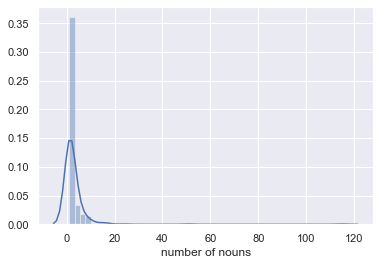

In [15]:
sns.set(color_codes=True)
sns.distplot(list(len(nouns) for nouns in buckets.values()), axlabel="number of nouns")

We collect the buckets of length 1 in two sets: those with Allah in the bucket and those with another word:

In [16]:
buckets1A = {
    bucket for (bucket, nouns) in buckets.items() if len(nouns) == 1 and "Alh" in nouns
}
buckets1N = {
    bucket
    for (bucket, nouns) in buckets.items()
    if len(nouns) == 1 and "Alh" not in nouns
}
print(f"with    Alh: {len(buckets1A):>3}")
print(f"without Alh: {len(buckets1N):>3}")

with    Alh:  39
without Alh: 163


Finally we show the roots of the verbs that are associated only with `Alh`:

In [17]:
sorted(buckets1A)

['$qq',
 'Axr',
 'Edd',
 'Efw',
 'Ehd',
 'Ejl',
 'Ejz',
 'Hdd',
 'Hrb',
 'HwT',
 'Hyf',
 'Sdq',
 'TbE',
 'bsT',
 'frD',
 'fsH',
 'gDb',
 'hwn',
 'jdl',
 'kfy',
 'krh',
 'mHS',
 'mHn',
 'mHq',
 'mHw',
 'mkr',
 'mnn',
 'myz',
 'nqm',
 'nsx',
 'qrD',
 'rDw',
 'sxT',
 'twb',
 'wfq',
 'wld',
 'xsf',
 'xtm',
 'xzy']

And now we want to find them back in the text and show the translations of the ayas they contain.

We compute a query out of the `bucket1A` contents, and run it.

In [18]:
condition = "|".join(buckets1A)
condition

'Ejz|xsf|Hrb|frD|xtm|mHq|rDw|nsx|wld|$qq|Hdd|mHw|Hyf|bsT|TbE|fsH|jdl|Ejl|sxT|wfq|mHn|mHS|qrD|Efw|Edd|hwn|Axr|twb|nqm|gDb|Ehd|mkr|krh|mnn|xzy|HwT|Sdq|kfy|myz'

In [19]:
query = f"""
aya
  word pos=verb
       root={condition}
  <: word pos=noun
"""

In [20]:
print(query)


aya
  word pos=verb
       root=Ejz|xsf|Hrb|frD|xtm|mHq|rDw|nsx|wld|$qq|Hdd|mHw|Hyf|bsT|TbE|fsH|jdl|Ejl|sxT|wfq|mHn|mHS|qrD|Efw|Edd|hwn|Axr|twb|nqm|gDb|Ehd|mkr|krh|mnn|xzy|HwT|Sdq|kfy|myz
  <: word pos=noun    



In [21]:
results = A.search(query)

  0.29s 78 results


Now we can show the results quite easily:

In [22]:
A.table(results, end=10)

n,p,aya,word,word
1,2:7,خَتَمَ ٱللَّهُ عَلَىٰ قُلُوبِهِمْ وَعَلَىٰ سَمْعِهِمْ وَعَلَىٰٓ أَبْصَٰرِهِمْ غِشَٰوَةٌ وَلَهُمْ عَذَابٌ عَظِيمٌ,خَتَمَ,ٱللَّهُ
2,2:245,مَّن ذَا ٱلَّذِى يُقْرِضُ ٱللَّهَ قَرْضًا حَسَنًا فَيُضَٰعِفَهُۥ لَهُۥٓ أَضْعَافًا كَثِيرَةً وَٱللَّهُ يَقْبِضُ وَيَبْصُۜطُ وَإِلَيْهِ تُرْجَعُونَ,يُقْرِضُ,ٱللَّهَ
3,2:276,يَمْحَقُ ٱللَّهُ ٱلرِّبَوٰا۟ وَيُرْبِى ٱلصَّدَقَٰتِ وَٱللَّهُ لَا يُحِبُّ كُلَّ كَفَّارٍ أَثِيمٍ,يَمْحَقُ,ٱللَّهُ
4,3:54,وَمَكَرُوا۟ وَمَكَرَ ٱللَّهُ وَٱللَّهُ خَيْرُ ٱلْمَٰكِرِينَ,مَكَرَ,ٱللَّهُ
5,3:95,قُلْ صَدَقَ ٱللَّهُ فَٱتَّبِعُوا۟ مِلَّةَ إِبْرَٰهِيمَ حَنِيفًا وَمَا كَانَ مِنَ ٱلْمُشْرِكِينَ,صَدَقَ,ٱللَّهُ
6,3:141,وَلِيُمَحِّصَ ٱللَّهُ ٱلَّذِينَ ءَامَنُوا۟ وَيَمْحَقَ ٱلْكَٰفِرِينَ,يُمَحِّصَ,ٱللَّهُ
7,3:155,إِنَّ ٱلَّذِينَ تَوَلَّوْا۟ مِنكُمْ يَوْمَ ٱلْتَقَى ٱلْجَمْعَانِ إِنَّمَا ٱسْتَزَلَّهُمُ ٱلشَّيْطَٰنُ بِبَعْضِ مَا كَسَبُوا۟ وَلَقَدْ عَفَا ٱللَّهُ عَنْهُمْ إِنَّ ٱللَّهَ غَفُورٌ حَلِيمٌ,عَفَا,ٱللَّهُ
8,3:164,لَقَدْ مَنَّ ٱللَّهُ عَلَى ٱلْمُؤْمِنِينَ إِذْ بَعَثَ فِيهِمْ رَسُولًا مِّنْ أَنفُسِهِمْ يَتْلُوا۟ عَلَيْهِمْ ءَايَٰتِهِۦ وَيُزَكِّيهِمْ وَيُعَلِّمُهُمُ ٱلْكِتَٰبَ وَٱلْحِكْمَةَ وَإِن كَانُوا۟ مِن قَبْلُ لَفِى ضَلَٰلٍ مُّبِينٍ,مَنَّ,ٱللَّهُ
9,4:17,إِنَّمَا ٱلتَّوْبَةُ عَلَى ٱللَّهِ لِلَّذِينَ يَعْمَلُونَ ٱلسُّوٓءَ بِجَهَٰلَةٍ ثُمَّ يَتُوبُونَ مِن قَرِيبٍ فَأُو۟لَٰٓئِكَ يَتُوبُ ٱللَّهُ عَلَيْهِمْ وَكَانَ ٱللَّهُ عَلِيمًا حَكِيمًا,يَتُوبُ,ٱللَّهُ
10,4:35,وَإِنْ خِفْتُمْ شِقَاقَ بَيْنِهِمَا فَٱبْعَثُوا۟ حَكَمًا مِّنْ أَهْلِهِۦ وَحَكَمًا مِّنْ أَهْلِهَآ إِن يُرِيدَآ إِصْلَٰحًا يُوَفِّقِ ٱللَّهُ بَيْنَهُمَآ إِنَّ ٱللَّهَ كَانَ عَلِيمًا خَبِيرًا,يُوَفِّقِ,ٱللَّهُ


We check the results in transcription

In [23]:
A.table(results, end=10, fmt="text-trans-full")

n,p,aya,word,word
1,2:7,xatama {ll~ahu EalaY` quluwbihimo waEalaY` samoEihimo waEalaY`^ >aboSa`rihimo gi$a`wapN walahumo Ea*aAbN EaZiymN,xatama,{ll~ahu
2,2:245,"m~an *aA {l~a*iY yuqoriDu {ll~aha qaroDFA HasanFA fayuDa`Eifahu, lahu,^ >aDoEaAfFA kaviyrapF wa{ll~ahu yaqobiDu wayaboS:uTu wa<ilayohi turojaEuwna",yuqoriDu,{ll~aha
3,2:276,yamoHaqu {ll~ahu {lr~ibaw`A@ wayurobiY {lS~adaqa`ti wa{ll~ahu laA yuHib~u kul~a kaf~aArK >aviymK,yamoHaqu,{ll~ahu
4,3:54,wamakaruwA@ wamakara {ll~ahu wa{ll~ahu xayoru {loma`kiriyna,makara,{ll~ahu
5,3:95,qulo Sadaqa {ll~ahu fa{t~abiEuwA@ mil~apa <ibora`hiyma HaniyfFA wamaA kaAna mina {lomu$orikiyna,Sadaqa,{ll~ahu
6,3:141,waliyumaH~iSa {ll~ahu {l~a*iyna 'aAmanuwA@ wayamoHaqa {loka`firiyna,yumaH~iSa,{ll~ahu
7,3:155,<in~a {l~a*iyna tawal~awoA@ minkumo yawoma {lotaqaY {lojamoEaAni <in~amaA {sotazal~ahumu {l$~ayoTa`nu bibaEoDi maA kasabuwA@ walaqado EafaA {ll~ahu Eanohumo <in~a {ll~aha gafuwrN HaliymN,EafaA,{ll~ahu
8,3:164,laqado man~a {ll~ahu EalaY {lomu&ominiyna <i*o baEava fiyhimo rasuwlFA m~ino >anfusihimo yatoluwA@ Ealayohimo 'aAya`tihi. wayuzak~iyhimo wayuEal~imuhumu {lokita`ba wa{loHikomapa wa<in kaAnuwA@ min qabolu lafiY Dala`lK m~ubiynK,man~a,{ll~ahu
9,4:17,<in~amaA {lt~awobapu EalaY {ll~ahi lil~a*iyna yaEomaluwna {ls~uw^'a bijaha`lapK vum~a yatuwbuwna min qariybK fa>uw@la`^}ika yatuwbu {ll~ahu Ealayohimo wakaAna {ll~ahu EaliymFA HakiymFA,yatuwbu,{ll~ahu
10,4:35,wa<ino xifotumo $iqaAqa bayonihimaA fa{boEavuwA@ HakamFA m~ino >aholihi. waHakamFA m~ino >aholihaA^ <in yuriydaA^ <iSola`HFA yuwaf~iqi {ll~ahu bayonahumaA^ <in~a {ll~aha kaAna EaliymFA xabiyrFA,yuwaf~iqi,{ll~ahu


Even better, we have a transcription that only shows the roots of the words:

In [24]:
A.table(results, end=10, fmt="root-trans-full")

n,p,aya,word,word
1,2:7,xtm Alh qlb smE bSr g$w E*b EZm,xtm,Alh
2,2:245,qrD Alh qrD Hsn DEf DEf kvr Alh qbD bsT rjE,qrD,Alh
3,2:276,mHq Alh rbw rbw Sdq Alh Hbb kll kfr Avm,mHq,Alh
4,3:54,mkr mkr Alh Alh xyr mkr,mkr,Alh
5,3:95,qwl Sdq Alh tbE mll Hnf kwn $rk,Sdq,Alh
6,3:141,mHS Alh Amn mHq kfr,mHS,Alh
7,3:155,wly ywm lqy jmE zll $Tn bED ksb Efw Alh Alh gfr Hlm,Efw,Alh
8,3:164,mnn Alh Amn bEv rsl nfs tlw Ayy zkw Elm ktb Hkm kwn qbl Dll byn,mnn,Alh
9,4:17,twb Alh Eml swA jhl twb qrb twb Alh kwn Alh Elm Hkm,twb,Alh
10,4:35,xwf $qq byn bEv Hkm Ahl Hkm Ahl rwd SlH wfq Alh byn Alh kwn Elm xbr,wfq,Alh


But we wanted the translations of the relevant ayas. Here they come:

In [25]:
for (aya, verb, noun) in results:
    print(Fs("translation@en").v(aya))
    print("-----")

God has set a seal on their hearts and on their hearing, and on their eyes is a covering, and there awaits them a mighty chastisement.
-----
Who is he that will lend God a good loan, and He will multiply it for him manifold? God grasps, and outspreads; and unto Him you shall be returned.
-----
God blots out usury, but freewill offerings He augments with interest. God loves not any guilty ingrate.
-----
And they devised, and God devised, and God is the best of devisers.
-----
Say: 'God has spoken the truth; therefore follow the creed of Abraham, a man of pure faith and no idolater.'
-----
and that God may prove the believers, and blot out the unbelievers.
-----
Those of you who turned away the day the two hosts encountered -- Satan made them slip for somewhat they had earned; but God has pardoned them; God is All-forgiving, All-clement.
-----
Truly God was gracious to the believers when He raised up among them a Messenger from themselves, to recite to them His signs and to purify them, 